In [12]:
%matplotlib inline
import networkx as nx 
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import graphwave
from graphwave.shapes import build_graph
from graphwave.graphwave import *

np.random.seed(123)

In [13]:
import sys

In [14]:
import numpy as np 
import pandas as pd

import scanpy as sc
from scipy.sparse import csr_matrix

In [15]:
sys.path.insert(0, '../sca/')

In [16]:
from shannonca.dimred import reduce, reduce_scanpy

In [17]:
# from shannonca.eval import fidelity, group_fidelity

In [18]:
import networkx as nx

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
sys.path.insert(0,'../ben-progress/src/')
from kernels import sig_dists, sig_dists_thresh0

In [21]:
ss = sc.read('../data/ss3_hca.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Three Dimensions!

In [22]:
m_sm = np.array([0, 0, 0, 1])
m_big = np.array([0,0, 0, -1])

cov_sm = np.array([[10, 0, 0,0], [0,10,0,0], [0,0,10,0], [0, 0,0, .1]])
cov_big = np.array([[10, 0, 0,0], [0,10,0,0], [0,0,10,0], [0, 0,0, .75]])

In [23]:
smN = 100
smB = 1000

In [24]:
smalls = np.random.multivariate_normal(mean = m_sm, cov=cov_sm, size=smN)


In [25]:
bigs = np.random.multivariate_normal(mean= m_big, cov=cov_big, size=smB)

In [26]:
total = np.vstack((smalls, bigs))

In [27]:
labs = ["sm" for i in range(smN)] + ["big" for i in range(smB)]

In [28]:
pancake = pd.DataFrame(total, columns=["noise1", "noise2", "noise3", "marker"])

In [29]:
pancake["label"] = labs

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

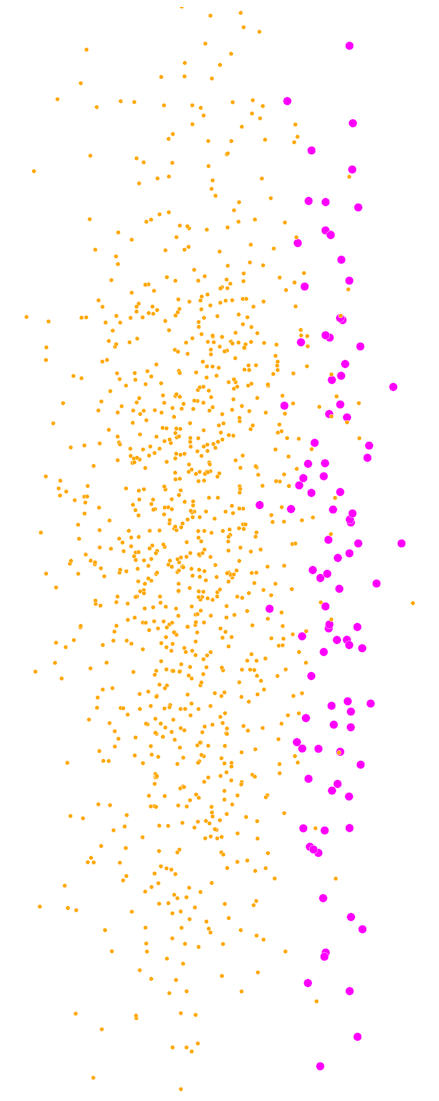

In [31]:
# sns.set(font_scale=1, style="white")

fig, ax = plt.subplots(1,1, figsize=[20,20])

ax.set_aspect("equal")

# ax = f
# 

ax.set_ylim([-7.5,7.5])
sns.scatterplot(y="noise1", x="marker", size="label", size_order=["sm", "big"], hue=pancake["label"].values, 
                palette=["magenta", "orange"], data=pancake, alpha=1, s=80, legend=False)

ax.set_axis_off()
# ax.set_legend(False)
# fig.savefig("figs/pancake_4d.png", bbox_inches="tight", transparent=False)

# fig.savefig("figs/pancake_4d_transp.png", transparent=True, bbox_inches="tight")

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

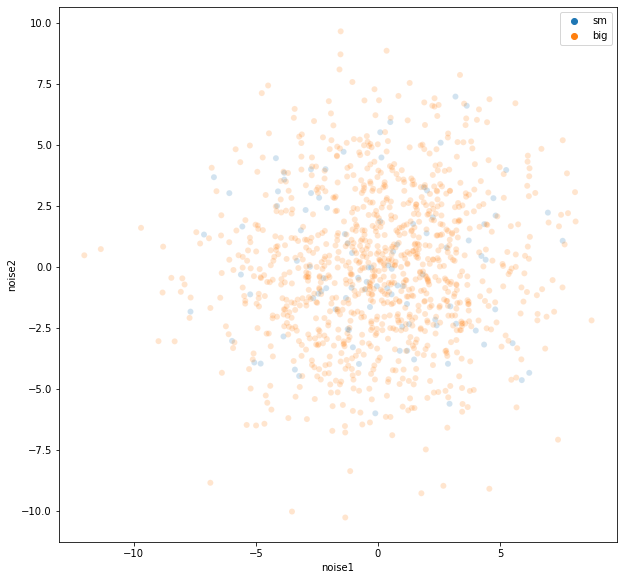

In [32]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")

# ax = f
# 
sns.scatterplot(x="noise1", y="noise2", hue=pancake["label"].values, data=pancake, alpha=.2)

<AxesSubplot:xlabel='marker', ylabel='Count'>

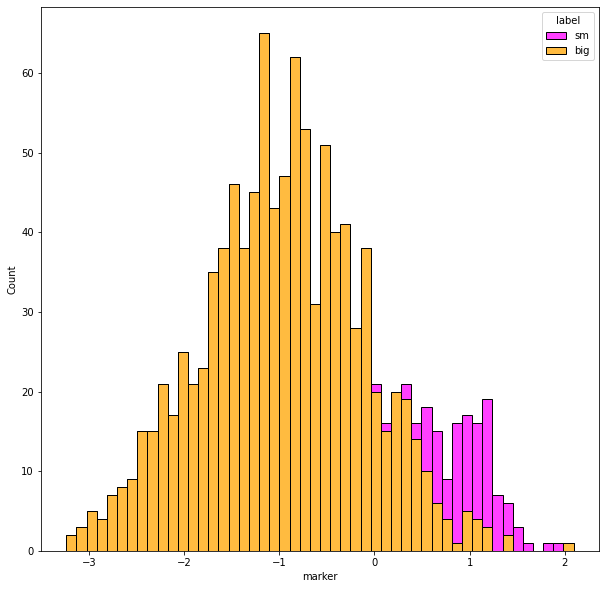

In [33]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

# ax.set_aspect("equal")

# ax = f
# 


sns.histplot(x="marker", hue="label",data=pancake, multiple="stack", bins=50, palette=["magenta", "orange"], ax=ax)

# plt.savefig("figs/hist_4d.png", bbox_inches="tight", transparent=False)

In [34]:
ad = sc.AnnData(total)

In [35]:
from scipy import sparse

In [36]:
ads = sc.AnnData(sparse.csr_matrix(total))

In [37]:
ad.obs["label"] = labs

In [38]:
ads.obs["label"] = labs

In [39]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'

In [40]:
sc.pp.neighbors(ad, n_neighbors=5)

sc.pp.neighbors(ads, n_neighbors=5)

In [41]:
reduce_scanpy(ads, iters=5, keep_scores=True, metric='euclidean', n_tests=1, n_comps=3, n_pcs=3, model="ttest")

{'scaled': False}
{'scaled': False}
{'scaled': False}
{'scaled': False}
{'scaled': False}


In [42]:
ads

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors'
    obsm: 'X_sca'
    varm: 'sca_loadings'
    layers: 'sca_score'
    obsp: 'distances', 'connectivities'

In [43]:
sc.pp.neighbors(ads, use_rep='X_sca', key_added='sca', metric='euclidean')
sc.tl.umap(ads, neighbors_key='sca')
ads.obsm['X_umap_sca'] = ads.obsm['X_umap']

In [44]:
ads.obs

,label
0,sm
1,sm
2,sm
3,sm
4,sm
...,...
1095,big
1096,big
1097,big
1098,big


... storing 'label' as categorical


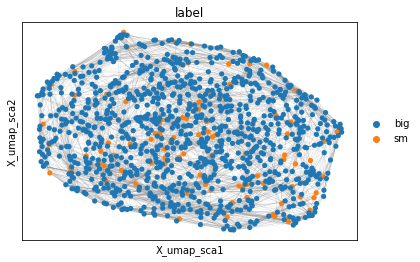

In [45]:
sc.pl.embedding(ads, basis='X_umap_sca', color="label",  edges=True, neighbors_key='sca', layer='heat')

In [46]:
sigs = ads.layers["sca_score"].toarray()

In [47]:
sigs[pancake.label=="big"].mean(axis=0)

array([7.29819592, 7.29443985, 7.35446705, 1.09525648])

In [48]:
# from scalpel.generators import pancakes
# from scalpel.embed.embedders import PCAEmbedder, GenePCAEmbedder
# from scalpel.eval import plot_umap
# from scalpel.metrics import diff_corr
# sc.tl.umap(ad)

In [49]:
# sc.pl.embedding(ad, basis=)

In [50]:
ad.uns

OverloadedDict, wrapping:
	OrderedDict([('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 5, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean'}})])
With overloaded keys:
	['neighbors'].

In [51]:
# plot_umap(ad, name="test", rerun=True, edges=True, color='label')
sc.pp.neighbors(ad, n_neighbors=15)

In [52]:
ad.obsm

AxisArrays with keys: 

In [53]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

In [54]:
sc.tl.umap(ad, neighbors_key="neighbors")

In [55]:
ad.X

array([[ 0.8948566 , -3.4330654 ,  3.1538832 ,  0.5236678 ],
       [-7.6738334 , -1.8296946 ,  5.222301  ,  0.86436594],
       [-2.1468265 ,  4.003242  , -2.7408738 ,  0.9700504 ],
       ...,
       [-0.5941108 ,  3.1303024 , -0.22258453, -1.6182778 ],
       [-0.38961872,  0.1768099 , -7.341799  , -1.5577391 ],
       [-1.3114679 , -0.5302059 , -4.77741   ,  0.2953588 ]],
      dtype=float32)

In [56]:
ad.obsm["X_umap"]

array([[ 3.5156236,  7.959208 ],
       [ 1.3843468, 10.277837 ],
       [ 7.8410325,  1.4196823],
       ...,
       [ 8.715036 ,  3.990538 ],
       [ 4.2617097,  0.7996333],
       [ 3.3874931,  1.6154178]], dtype=float32)

In [57]:
ad.obsm['X_umap'] = ad.obsm['X_umap']
ad.obsm["X_nat"] = ad.X[:,[0,-1]]

... storing 'label' as categorical


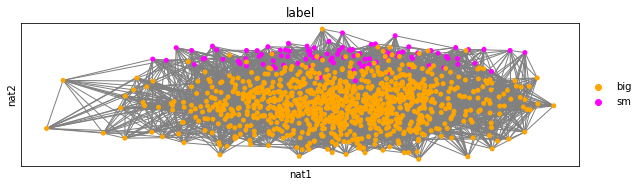

In [58]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")
sc.pl.embedding(ad, basis='nat', edges=True, edges_width=1, size=100, ax=ax, **{"color" : "label", "palette" : ["orange", "magenta"]})

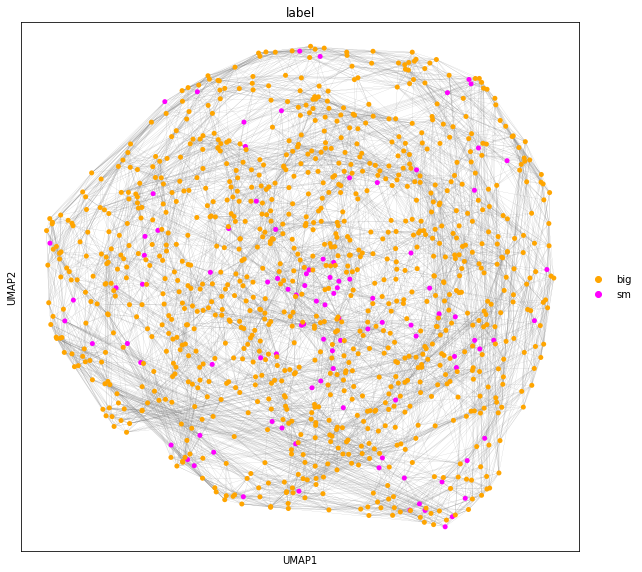

In [59]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")
sc.pl.embedding(ad, basis='umap', edges=True, edges_width=.1, size=100, ax=ax, 
                **{"color" : "label", "palette" : ["orange", "magenta"]})

# plt.savefig("figs/umap_4d.png", bbox_inches="tight", transparent=False)

In [60]:
ad.uns["neighbors"]

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean'}}
With overloaded keys:
	['connectivities', 'distances'].

In [61]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors', 'umap', 'label_colors'
    obsm: 'X_umap', 'X_nat'
    obsp: 'distances', 'connectivities'

In [62]:
import pygsp

In [63]:
ad.obsp["connectivities"] = ad.obsp["connectivities"]

In [64]:
W = ad.obsp["connectivities"]

In [65]:
G = pygsp.graphs.Graph(W)

In [66]:
G

In [67]:
G.is_connected()

True

In [68]:
G.L

<1100x1100 sparse matrix of type '<class 'numpy.float32'>'
	with 20932 stored elements in Compressed Sparse Column format>

In [69]:
G.compute_fourier_basis()
G.U.shape

AssertionError: 

In [70]:
G.set_coordinates(ad.X[:,-2:])

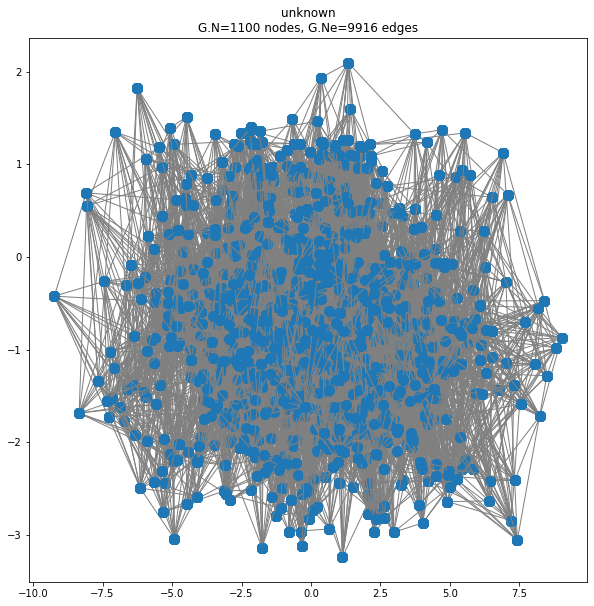

In [71]:
fgi, ax = plt.subplots(1,1, figsize=[10,10])

G.plot(ax=ax,)

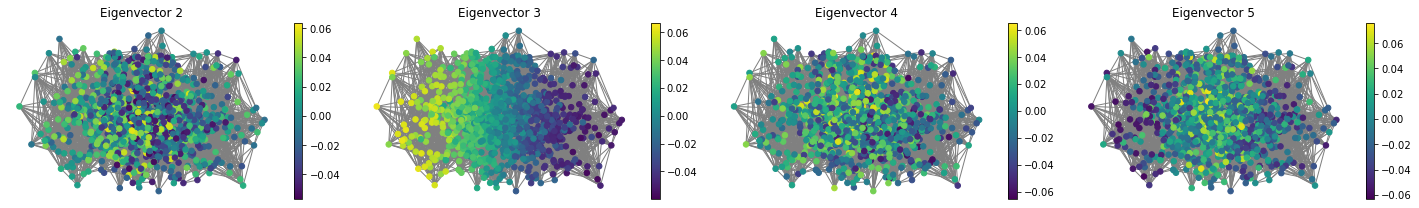

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i+1], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()


In [73]:
g = pygsp.filters.Meyer(G, Nf=10)  # Nf = 6 filters in the filter bank.

2021-05-28 13:37:53,476:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


In [74]:
DELTA = 0 
# s = G.get_coord
# g.localize(DELTA)

s = G.coords
s = g.filter(s)

In [75]:
s.shape

(1100, 2, 10)

In [76]:
G.coords

array([[ 3.1538832 ,  0.5236678 ],
       [ 5.222301  ,  0.86436594],
       [-2.7408738 ,  0.9700504 ],
       ...,
       [-0.22258453, -1.6182778 ],
       [-7.341799  , -1.5577391 ],
       [-4.77741   ,  0.2953588 ]], dtype=float32)

In [77]:
s.shape

(1100, 2, 10)

In [78]:
ad.X

array([[ 0.8948566 , -3.4330654 ,  3.1538832 ,  0.5236678 ],
       [-7.6738334 , -1.8296946 ,  5.222301  ,  0.86436594],
       [-2.1468265 ,  4.003242  , -2.7408738 ,  0.9700504 ],
       ...,
       [-0.5941108 ,  3.1303024 , -0.22258453, -1.6182778 ],
       [-0.38961872,  0.1768099 , -7.341799  , -1.5577391 ],
       [-1.3114679 , -0.5302059 , -4.77741   ,  0.2953588 ]],
      dtype=float32)

In [79]:
import meld

In [80]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors', 'umap', 'label_colors'
    obsm: 'X_umap', 'X_nat'
    obsp: 'distances', 'connectivities'

In [81]:
sample_densities = meld.MELD().fit_transform(ad.X, np.array(labs))

Building graph on 1100 samples and 4 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.02 seconds.
  Calculating affinities...
Calculated graph and diffusion operator in 0.04 seconds.


In [82]:
sample_densities

,big,sm
0,0.000910,0.000896
1,0.000926,0.000740
2,0.000875,0.001250
3,0.000879,0.001205
4,0.000931,0.000685
...,...,...
1095,0.000901,0.000987
1096,0.000885,0.001145
1097,0.000920,0.000805
1098,0.000900,0.001003


<AxesSubplot:xlabel='noise1', ylabel='marker'>

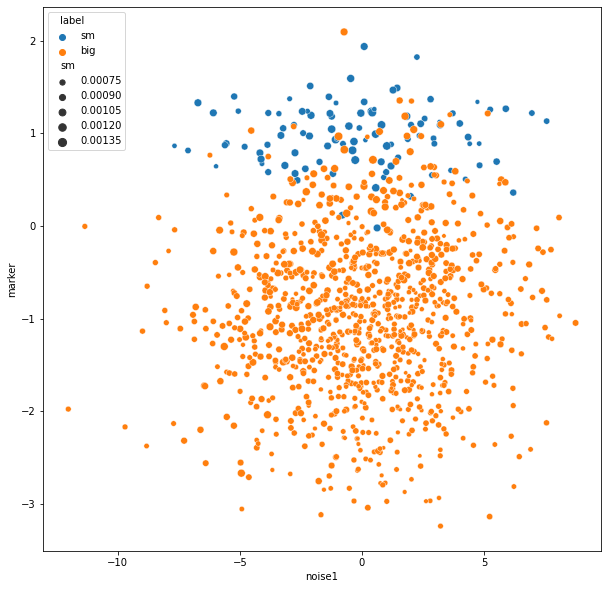

In [83]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="label", size=sample_densities.sm)

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

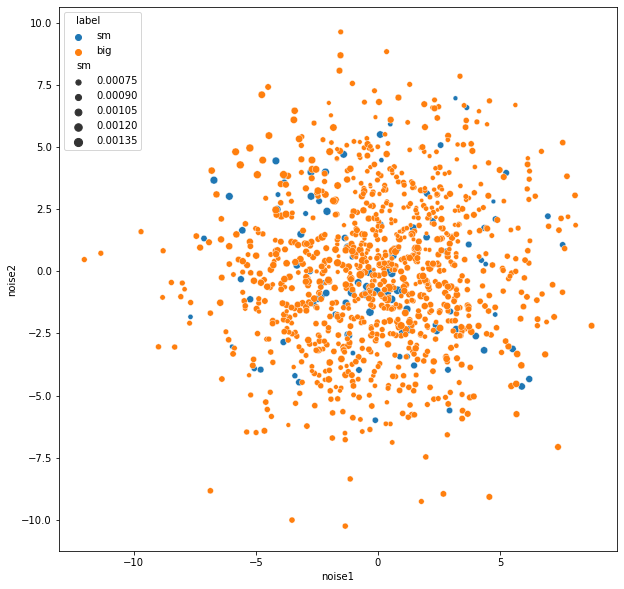

In [84]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="noise2", hue="label", size=sample_densities.sm)

<AxesSubplot:>

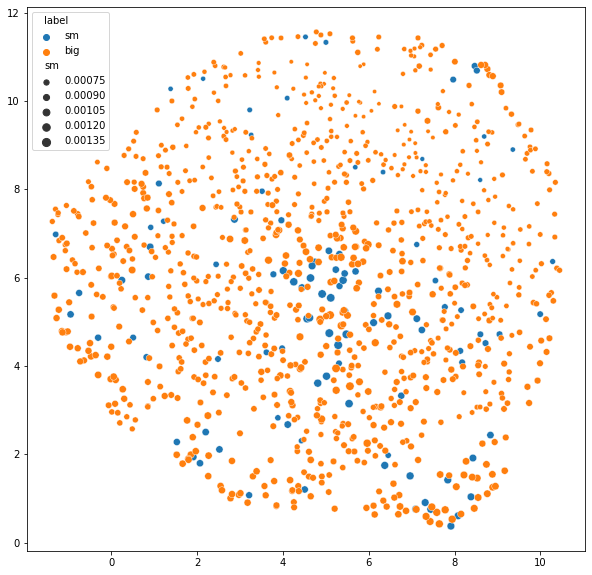

In [85]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x=ad.obsm["X_umap"][:,0], y=ad.obsm["X_umap"][:,1], hue="label", size=sample_densities.sm)

In [86]:
pancake

,noise1,noise2,noise3,marker,label
0,0.894857,-3.433065,3.153883,0.523668,sm
1,-7.673834,-1.829695,5.222301,0.864366,sm
2,-2.146827,4.003242,-2.740874,0.970050,sm
3,-1.403994,4.716188,-2.020386,0.862646,sm
4,3.175097,6.975763,6.915225,1.122123,sm
...,...,...,...,...,...
1095,-3.975552,1.195591,1.040834,-0.607974,big
1096,1.292239,-2.039880,-1.552295,0.376427,big
1097,-0.594111,3.130302,-0.222585,-1.618278,big
1098,-0.389619,0.176810,-7.341799,-1.557739,big


<AxesSubplot:xlabel='noise1', ylabel='marker'>

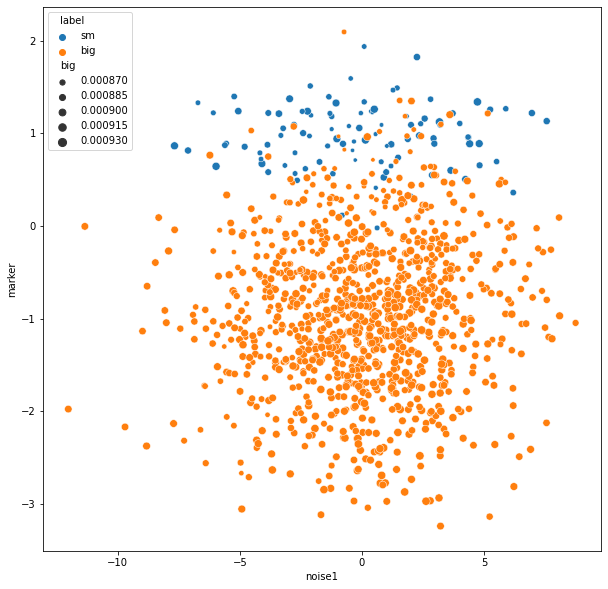

In [87]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="label", size=sample_densities.big)

<AxesSubplot:xlabel='noise1', ylabel='marker'>

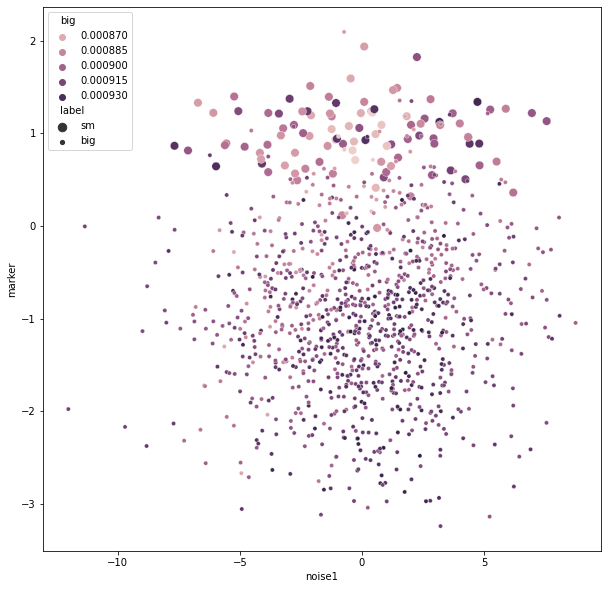

In [88]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue=sample_densities.big, size="label")

In [89]:
g

In [90]:
G

In [91]:
G.coords

array([[ 3.1538832 ,  0.5236678 ],
       [ 5.222301  ,  0.86436594],
       [-2.7408738 ,  0.9700504 ],
       ...,
       [-0.22258453, -1.6182778 ],
       [-7.341799  , -1.5577391 ],
       [-4.77741   ,  0.2953588 ]], dtype=float32)

In [92]:
s = ad.X[:,-1]

In [93]:
s.shape

(1100,)

In [94]:
s = g.filter(s)

In [95]:
s.shape

(1100, 10)

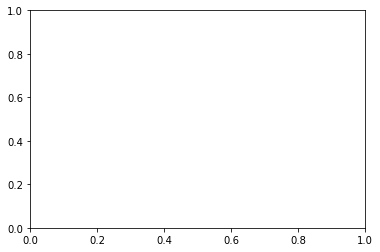

In [96]:
# fig, axes = plt.subplots(1, 4, figsize=(20, 3))
for i, ax in enumerate(axes):
    G.plot_signal(s[:,4+i], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()


In [97]:
s

array([[-1.01841268,  0.25827263,  0.21900418, ...,  1.09087134,
        -0.00960081,  0.02547893],
       [-1.00706887,  0.23465002,  0.19897322, ...,  1.15126595,
         0.56208924, -0.00336832],
       [-1.01924452,  0.26217297,  0.22231151, ...,  0.80125835,
         0.0778097 , -0.01093206],
       ...,
       [-1.01616777,  0.25457272,  0.21586682, ..., -0.48336756,
         0.4890809 ,  0.04612766],
       [-1.00681687,  0.22855951,  0.19380873, ...,  0.4776172 ,
        -0.26013522, -0.02582457],
       [-1.01113966,  0.23925317,  0.20287649, ...,  0.79708721,
        -0.14699186,  0.05792749]])

In [98]:
pancake[[f"eigen_{i}" for i in range(s.shape[1])]] = s

In [99]:
pancake

,noise1,noise2,noise3,marker,label,eigen_0,eigen_1,eigen_2,eigen_3,eigen_4,eigen_5,eigen_6,eigen_7,eigen_8,eigen_9
0,0.894857,-3.433065,3.153883,0.523668,sm,-1.018413,0.258273,0.219004,-0.239504,0.040832,-0.096229,0.673188,1.090871,-0.009601,0.025479
1,-7.673834,-1.829695,5.222301,0.864366,sm,-1.007069,0.234650,0.198973,-0.313680,0.081389,-0.133455,0.880420,1.151266,0.562089,-0.003368
2,-2.146827,4.003242,-2.740874,0.970050,sm,-1.019245,0.262173,0.222312,-0.189528,0.101372,0.317317,0.701402,0.801258,0.077810,-0.010932
3,-1.403994,4.716188,-2.020386,0.862646,sm,-1.018100,0.259578,0.220111,-0.192564,0.085866,0.257250,0.686769,1.022007,-0.229293,0.023145
4,3.175097,6.975763,6.915225,1.122123,sm,-1.019360,0.262932,0.222955,-0.305387,-0.039997,-0.035204,0.238009,1.159954,0.818626,0.003649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-3.975552,1.195591,1.040834,-0.607974,big,-1.027986,0.284946,0.241622,-0.378403,0.236726,0.187515,-0.277180,-0.123885,0.398070,0.043259
1096,1.292239,-2.039880,-1.552295,0.376427,big,-1.014281,0.247543,0.209906,-0.069817,0.170244,0.585426,0.595528,0.384215,-0.183928,-0.025593
1097,-0.594111,3.130302,-0.222585,-1.618278,big,-1.016168,0.254573,0.215867,-0.215600,0.098845,-0.633543,-0.231320,-0.483368,0.489081,0.046128
1098,-0.389619,0.176810,-7.341799,-1.557739,big,-1.006817,0.228560,0.193809,0.034727,-0.062454,-0.224277,-0.854090,0.477617,-0.260135,-0.025825


<AxesSubplot:xlabel='noise1', ylabel='marker'>

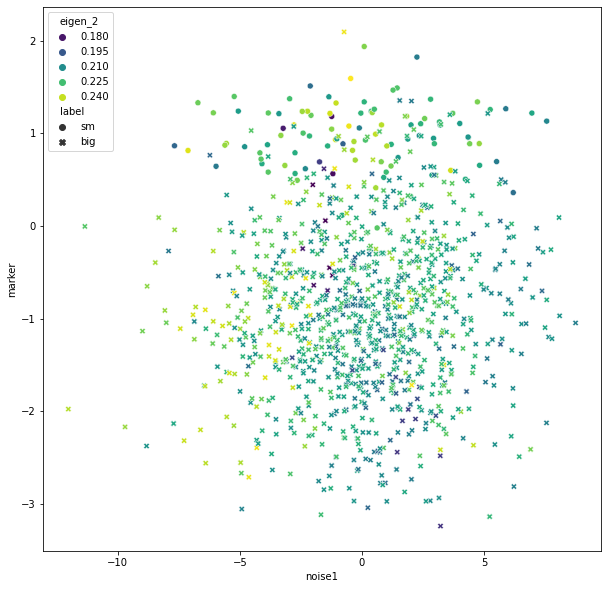

In [100]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="eigen_2", style="label", palette="viridis", ax=ax)

In [101]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("eigen")]].agg(["mean", "std"])

eigen_0             eigen_1             eigen_2             eigen_3  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big   -1.017986  0.005151  0.257969  0.013325  0.218747  0.011299 -0.203047   
sm    -1.020034  0.006507  0.262843  0.016626  0.222880  0.014098 -0.197988   

                  eigen_4            eigen_5             eigen_6            \
            std      mean      std      mean       std      mean       std   
label                                                                        
big    0.111907  0.102039  0.08593 -0.090693  0.423504 -0.093186  0.490869   
sm     0.108341  0.139657  0.10758  0.539776  0.690727  0.433255  0.402996   

        eigen_7             eigen_8             eigen_9            
           mean       std      mean       std      mean       std  
label                                                              
big   -0.069982  0.499028 -0.017712  0.279054 -0.000600  0.049425  
sm     0.715775  0.700103  0.179834  0.294674  0.006142  0.027107

In [102]:
pancake["sig_norm"] = pancake[[f"eigen_{i}" for i in range(s.shape[1])]].mean(axis="columns")

In [103]:
pancake.groupby("label")["sig_norm"].agg(["mean", "std"])

,mean,std
label,,
big,-0.091445,0.097116
sm,0.128214,0.038487


<AxesSubplot:xlabel='noise1', ylabel='marker'>

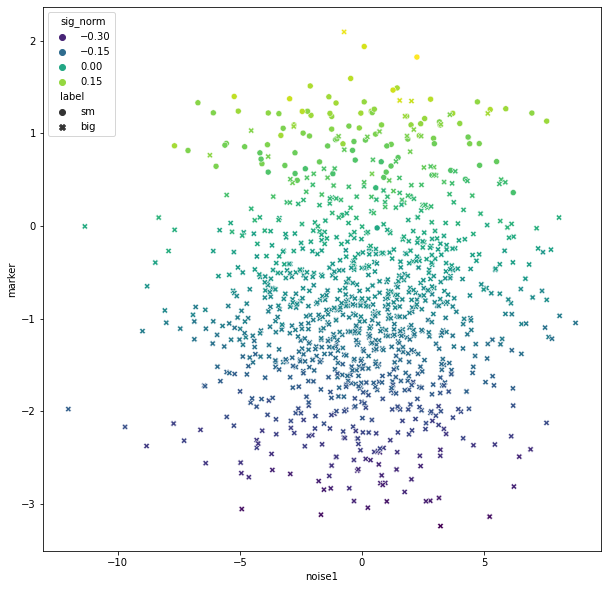

In [104]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="sig_norm", style="label", palette="viridis", ax=ax)

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

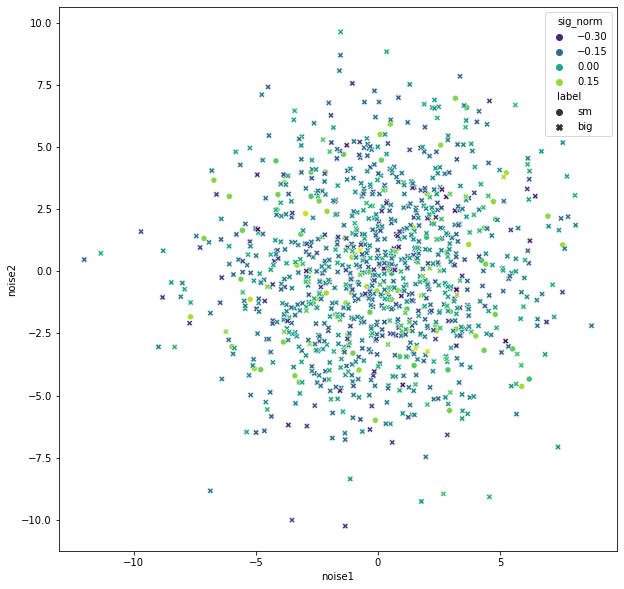

In [105]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="noise2", hue="sig_norm", style="label", palette="viridis", ax=ax)

In [106]:
s_n1 = ad.X[:,0]
s_n1 = g.filter(s_n1)

In [107]:
pancake[[f"eigen_noise_{i}" for i in range(s_n1.shape[1])]] = s_n1

In [108]:
pancake["sig_norm_n1"] = pancake[[f"eigen_noise_{i}" for i in range(s.shape[1])]].mean(axis="columns")

In [109]:
pancake.groupby("label")[[f"eigen_noise_{i}" for i in range(s.shape[1])]].agg(["mean", "std"])

eigen_noise_0           eigen_noise_1           eigen_noise_2            \
               mean       std          mean       std          mean       std   
label                                                                           
big        0.015118  0.046938     -0.003009  0.153027     -0.002551  0.129761   
sm         0.018073  0.042034     -0.012872  0.137321     -0.010915  0.116442   

      eigen_noise_3           eigen_noise_4           eigen_noise_5            \
               mean       std          mean       std          mean       std   
label                                                                           
big        0.007896  3.017536      0.000836  0.415568      0.009856  0.567083   
sm        -0.045272  3.144067     -0.025895  0.432536     -0.093010  0.605213   

      eigen_noise_6           eigen_noise_7           eigen_noise_8            \
               mean       std          mean       std          mean       std   
label                                                                           
big       -0.001828  0.340325      0.000279  0.279014      0.001473  0.210892   
sm         0.025813  0.387065     -0.003036  0.321854     -0.014775  0.212170   

      eigen_noise_9            
               mean       std  
label                          
big       -0.000156  0.044088  
sm         0.001554  0.020914

<AxesSubplot:xlabel='noise1', ylabel='marker'>

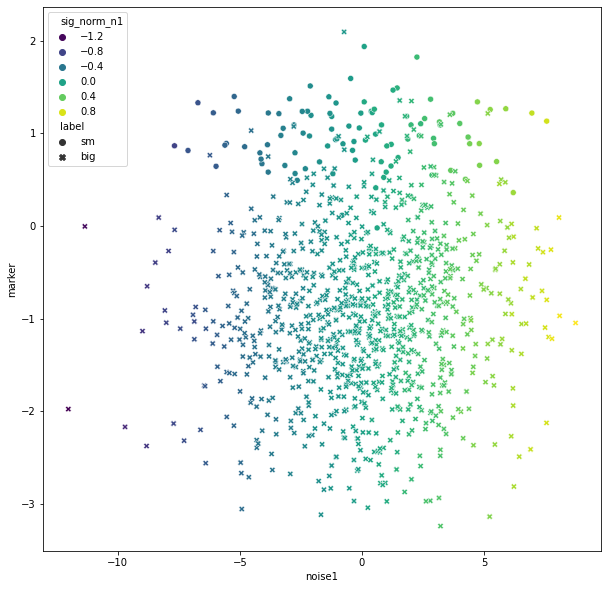

In [110]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="sig_norm_n1", style="label", palette="viridis", ax=ax)

In [111]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("sig_norm")]].agg(["mean", "std"])

sig_norm           sig_norm_n1          
           mean       std        mean       std
label                                          
big   -0.091445  0.097116    0.002792  0.318174
sm     0.128214  0.038487   -0.016033  0.336099

In [112]:
nxG = nxG = nx.from_scipy_sparse_matrix(ad.obsp["connectivities"])

In [113]:
chi, heat_print, taus = graphwave_alg(nxG, np.linspace(0,100,25), taus='auto', verbose=True)

In [114]:
chi.shape

(1100, 100)

In [115]:
heat_print

{0: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 562224 stored elements in Compressed Sparse Column format>,
 1: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1088874 stored elements in Compressed Sparse Column format>}

In [116]:
taus

array([1.20293438, 5.23318015])

In [117]:
# nb_clust=len(np.unique(role_id))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))

In [118]:
pancake[[f"chi_{i}" for i in range(chi.shape[1])]] = chi

In [119]:
pancake[[f"chi_PCA_{i}" for i in range(trans_data.shape[1])]] = trans_data

In [120]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("PCA")]].agg(["mean", "std"])

chi_PCA_0           chi_PCA_1           chi_PCA_2           chi_PCA_3  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big   -0.389888  6.670452  0.363790  6.202468 -0.034889  2.440869  0.041131   
sm     3.898878  5.476668 -3.637903  5.975280  0.348891  2.825864 -0.411306   

                chi_PCA_4            
            std      mean       std  
label                                
big    1.826599  0.010247  1.198888  
sm     1.618545 -0.102465  1.171602

In [121]:
import umap

In [122]:
um = umap.UMAP(densmap=True, verbose=True).fit_transform(chi)

UMAP(densmap=True, verbose=True)
Construct fuzzy simplicial set
Fri May 28 13:38:15 2021 Finding Nearest Neighbors
Fri May 28 13:38:17 2021 Finished Nearest Neighbor Search
Fri May 28 13:38:18 2021 Construct embedding
Fri May 28 13:38:18 2021 Computing original densities
	completed  0  /  700 epochs
	completed  70  /  700 epochs
	completed  140  /  700 epochs
	completed  210  /  700 epochs
	completed  280  /  700 epochs
	completed  350  /  700 epochs
	completed  420  /  700 epochs
	completed  490  /  700 epochs
	completed  560  /  700 epochs
	completed  630  /  700 epochs
Fri May 28 13:38:23 2021 Finished embedding


In [123]:
pancake[["chi_UMAP_0", "chi_UMAP_1"]] = um

<AxesSubplot:xlabel='chi_UMAP_0', ylabel='chi_UMAP_1'>

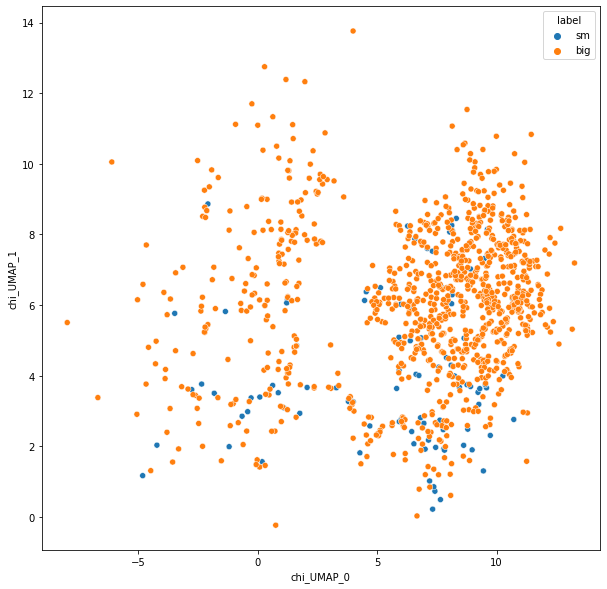

In [124]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="chi_UMAP_0", y="chi_UMAP_1", hue="label")

<AxesSubplot:xlabel='chi_PCA_1', ylabel='chi_PCA_4'>

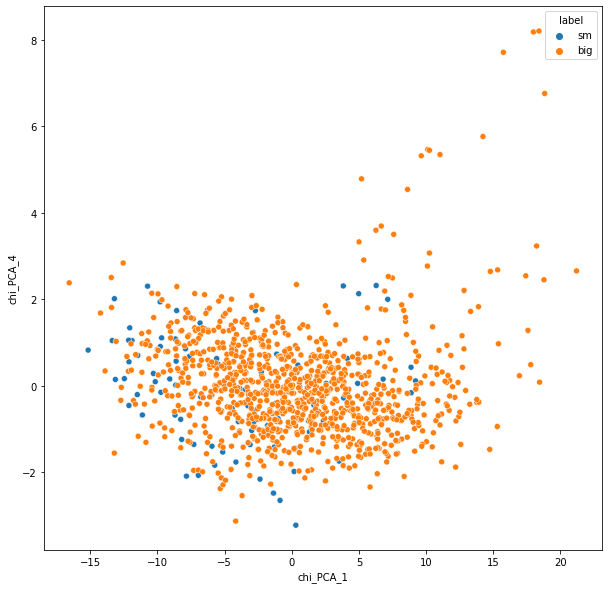

In [125]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="chi_PCA_1", y="chi_PCA_4", hue="label")

In [126]:
pancake.to_csv("../pancake_graphwave.csv")

In [127]:
pwd

'/Users/ashwinnarayan/Documents/MIT/gene_motivated_distances/gene-distances/graphwave'

## Calculate Expectation over Dimensions

In [128]:
heat_print

{0: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 562224 stored elements in Compressed Sparse Column format>,
 1: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1088874 stored elements in Compressed Sparse Column format>}

Computation

$\chi^{(\tau)}_{ij}$ is the amount of energy from vertex $i$ to vertex $j$. 

$X^{(j)}_i$ is the expression of gene $j$ in cell $i$. 

In [129]:
expectation = (csr_matrix(total).T)*(heat_print[0])

In [130]:
mom2 = (csr_matrix(total**2).T)*(heat_print[0])

In [131]:
expT = expectation.T.toarray()
varT = (mom2.T.toarray() - expT**2)

In [132]:
pancake[["noise1_E", "noise2_E", "noise3_E", "marker_E"]] = expT

<AxesSubplot:xlabel='noise2', ylabel='marker'>

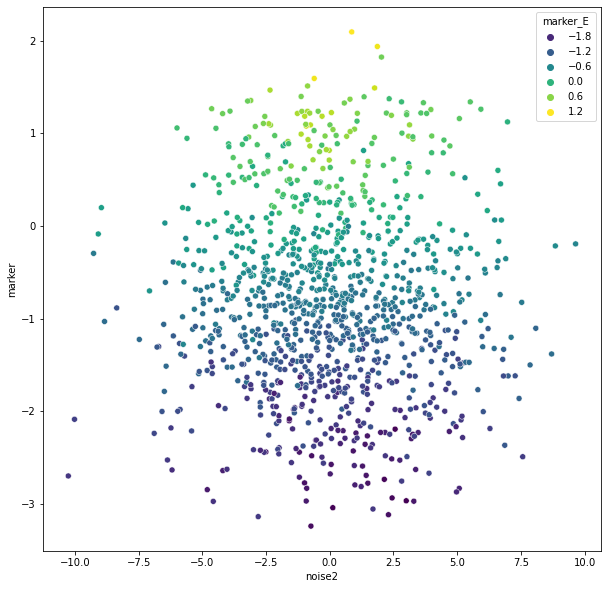

In [133]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise2", y="marker", hue="marker_E", palette="viridis")

In [134]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("_E")]].agg(["mean", "std"])

noise1_E            noise2_E            noise3_E            marker_E  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big    0.024108  3.020800 -0.014029  2.947903  0.209789  2.919882 -0.914136   
sm    -0.091150  3.042421  0.050876  2.583617 -0.367186  2.586259  0.371000   

                 
            std  
label            
big    0.576868  
sm     0.300180

In [135]:
pwd

'/Users/ashwinnarayan/Documents/MIT/gene_motivated_distances/gene-distances/graphwave'

In [136]:
time_pnts = np.linspace(0,10,100)

In [137]:
E_dict = {x : np.array(y) for x,y in (pancake[pancake.columns[pancake.columns.str.contains("_E")]].to_dict(orient="list")).items()} 

In [138]:
# gene_chi = charac_function_multiscale(E_dict, time_pnts)

In [139]:
E_dict

{'noise1_E': array([ 0.79538073, -6.44155949, -2.23422228, ..., -0.37608286,
        -0.48675061, -1.52700215]),
 'noise2_E': array([-3.36479468, -1.47603683,  4.0471886 , ...,  3.00451102,
        -0.09734857, -0.43179157]),
 'noise3_E': array([ 3.14623581,  4.79516553, -2.77405247, ..., -0.34737732,
        -6.87566707, -4.8813775 ]),
 'marker_E': array([ 0.02044206, -0.03261537,  0.43023961, ..., -1.53770614,
        -1.3451408 ,  0.01244505])}

In [140]:
heat_print[0].sum(axis=1)

matrix([[0.96507833],
        [0.94456921],
        [1.01796393],
        ...,
        [0.95605815],
        [1.00894181],
        [1.03507178]])

## Empirical Heatprint

In [141]:
from scipy import sparse

In [142]:
heat_print_d = heat_print[0].toarray()

In [143]:
total.shape

(1100, 4)

In [144]:
heat_print_d.shape

(1100, 1100)

In [145]:
gene_prod_mat = np.array([heat_print_d * total[:,i] for i in range(total.shape[1])])

In [146]:
gene_prod_dict = { i : sparse.csr_matrix(heat_print_d * total[:,i]) for i in range(total.shape[1]) } 

In [147]:
gene_prod_mat.shape

(4, 1100, 1100)

In [148]:
gene_chi = charac_function_multiscale(gene_prod_dict, time_pnts)

In [149]:
gene_chi

array([[ 1.        ,  0.        ,  0.9999995 , ...,  0.00386391,
         0.99863349,  0.00389118],
       [ 1.        ,  0.        ,  0.99996218, ...,  0.0048325 ,
         0.99728039,  0.00484982],
       [ 1.        ,  0.        ,  0.99999716, ...,  0.00584226,
         0.99712065,  0.00586901],
       ...,
       [ 1.        ,  0.        ,  0.99999981, ..., -0.00802819,
         0.99771882, -0.00812979],
       [ 1.        ,  0.        ,  0.9999999 , ..., -0.00766654,
         0.99654601, -0.0077528 ],
       [ 1.        ,  0.        ,  0.99999898, ...,  0.00262425,
         0.99952568,  0.00264851]])

In [150]:
gene_chi.shape

(1100, 800)

In [151]:
gene_chi_1 = charac_function_multiscale({ "marker" : gene_prod_dict[3]}, time_pnts)

In [152]:
gene_chi_n1 = charac_function_multiscale({ "noise1" : gene_prod_dict[0]}, time_pnts)

In [153]:
gene_chi_1

array([[ 1.        ,  0.        ,  0.99999983, ...,  0.00386391,
         0.99863349,  0.00389118],
       [ 1.        ,  0.        ,  0.99999952, ...,  0.0048325 ,
         0.99728039,  0.00484982],
       [ 1.        ,  0.        ,  0.99999942, ...,  0.00584226,
         0.99712065,  0.00586901],
       ...,
       [ 1.        ,  0.        ,  0.99999858, ..., -0.00802819,
         0.99771882, -0.00812979],
       [ 1.        ,  0.        ,  0.99999844, ..., -0.00766654,
         0.99654601, -0.0077528 ],
       [ 1.        ,  0.        ,  0.99999995, ...,  0.00262425,
         0.99952568,  0.00264851]])

In [154]:
umap_chi = umap.UMAP().fit_transform(gene_chi_1)

In [155]:
umap_chi_n1 = umap.UMAP().fit_transform(gene_chi_n1)

In [156]:
umap_chi_sc = umap.UMAP().fit_transform(gene_chi)

In [157]:
umap_chi

array([[-3.998216 , 10.287019 ],
       [-3.4983094, 13.289741 ],
       [-2.9627528, 14.751877 ],
       ...,
       [13.421988 , 11.856353 ],
       [13.02346  , 11.099273 ],
       [-4.0238075,  6.555112 ]], dtype=float32)

In [158]:
pancake[["umap_chi_sc_x", "umap_chi_sc_y"]] = umap_chi_sc

In [159]:
pancake[["umap_chi_x", "umap_chi_y"]] = umap_chi

In [160]:
pancake[["umap_chi_n1_x", "umap_chi_n1_y"]] = umap_chi_n1

<AxesSubplot:xlabel='umap_chi_x', ylabel='umap_chi_y'>

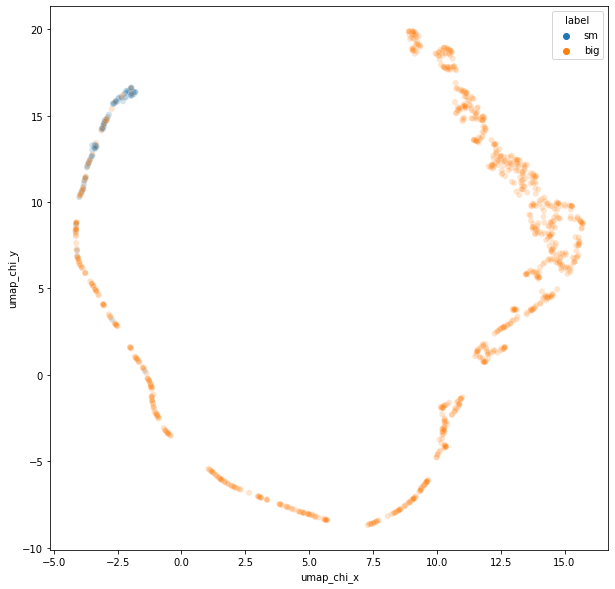

In [161]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_x", y="umap_chi_y", data=pancake, hue="label", alpha=.2)

<AxesSubplot:xlabel='umap_chi_sc_x', ylabel='umap_chi_sc_y'>

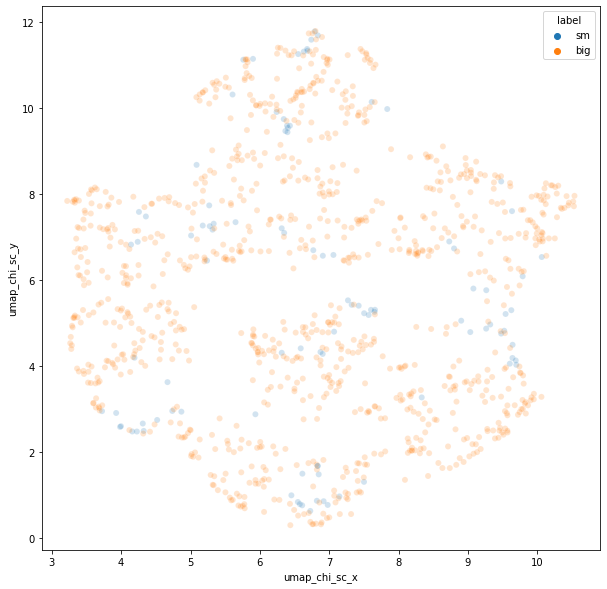

In [162]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_sc_x", y="umap_chi_sc_y", data=pancake, hue="label", alpha=.2)

<AxesSubplot:xlabel='umap_chi_n1_x', ylabel='umap_chi_n1_y'>

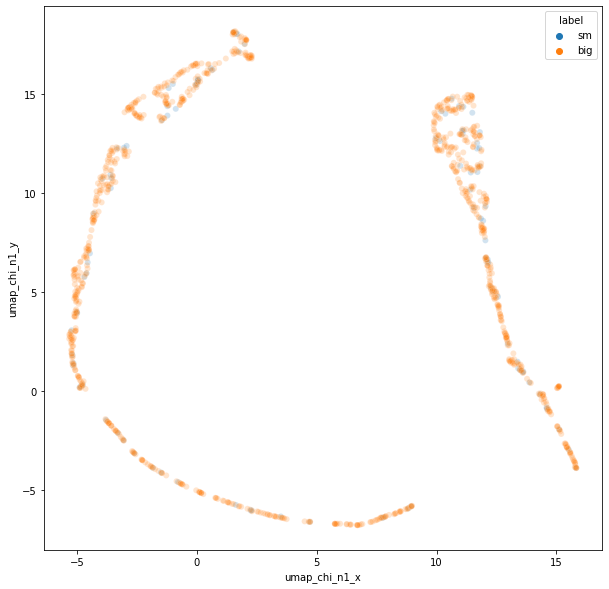

In [163]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_n1_x", y="umap_chi_n1_y", data=pancake, hue="label", alpha=.2)

In [164]:
pancake

,noise1,noise2,noise3,marker,label,eigen_0,eigen_1,eigen_2,eigen_3,eigen_4,...,noise1_E,noise2_E,noise3_E,marker_E,umap_chi_sc_x,umap_chi_sc_y,umap_chi_x,umap_chi_y,umap_chi_n1_x,umap_chi_n1_y
0,0.894857,-3.433065,3.153883,0.523668,sm,-1.018413,0.258273,0.219004,-0.239504,0.040832,...,0.795381,-3.364795,3.146236,0.020442,5.605874,10.305552,-3.998216,10.287019,-4.826919,0.230170
1,-7.673834,-1.829695,5.222301,0.864366,sm,-1.007069,0.234650,0.198973,-0.313680,0.081389,...,-6.441559,-1.476037,4.795166,-0.032615,4.356193,7.469393,-3.498309,13.289741,11.491253,14.055385
2,-2.146827,4.003242,-2.740874,0.970050,sm,-1.019245,0.262173,0.222312,-0.189528,0.101372,...,-2.234222,4.047189,-2.774052,0.430240,6.978122,0.760382,-2.962753,14.751877,12.127236,6.479773
3,-1.403994,4.716188,-2.020386,0.862646,sm,-1.018100,0.259578,0.220111,-0.192564,0.085866,...,-1.470341,4.471839,-2.178345,0.333489,7.146660,0.958849,-3.396723,13.321342,13.377723,1.470250
4,3.175097,6.975763,6.915225,1.122123,sm,-1.019360,0.262932,0.222955,-0.305387,-0.039997,...,3.076374,5.380099,4.910761,-0.020099,9.636283,7.593193,-2.672401,15.662533,-1.448936,13.678247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-3.975552,1.195591,1.040834,-0.607974,big,-1.027986,0.284946,0.241622,-0.378403,0.236726,...,-3.916242,1.119292,1.162382,-0.796167,5.528711,6.464787,9.615149,-6.159319,10.649402,12.322873
1096,1.292239,-2.039880,-1.552295,0.376427,big,-1.014281,0.247543,0.209906,-0.069817,0.170244,...,1.254939,-2.118372,-1.591361,0.275584,7.010364,4.951861,-4.132952,8.022414,-5.109671,3.900916
1097,-0.594111,3.130302,-0.222585,-1.618278,big,-1.016168,0.254573,0.215867,-0.215600,0.098845,...,-0.376083,3.004511,-0.347377,-1.537706,8.307682,1.961411,13.421988,11.856353,15.826780,-3.901000
1098,-0.389619,0.176810,-7.341799,-1.557739,big,-1.006817,0.228560,0.193809,0.034727,-0.062454,...,-0.486751,-0.097349,-6.875667,-1.345141,6.005194,2.224561,13.023460,11.099273,8.701672,-5.986104


In [165]:
pop_vars = pancake[["noise1", "noise2", "noise3", "marker"]].agg(["mean", "std"])

In [166]:
pop_vars

,noise1,noise2,noise3,marker
mean,0.012088,-0.007943,0.158144,-0.799841
std,3.189041,3.093657,3.070528,0.982386


In [167]:
expT

array([[ 0.79538073, -3.36479468,  3.14623581,  0.02044206],
       [-6.44155949, -1.47603683,  4.79516553, -0.03261537],
       [-2.23422228,  4.0471886 , -2.77405247,  0.43023961],
       ...,
       [-0.37608286,  3.00451102, -0.34737732, -1.53770614],
       [-0.48675061, -0.09734857, -6.87566707, -1.3451408 ],
       [-1.52700215, -0.43179157, -4.8813775 ,  0.01244505]])

In [168]:
varT

array([[ 0.6093416 ,  1.20908262,  1.1801562 ,  0.44666588],
       [ 4.73060287,  1.31429692,  3.77223686,  0.98777806],
       [ 0.8882206 ,  0.78249585,  0.64158527,  0.63900492],
       ...,
       [ 0.59468562,  1.04375733,  0.71951625,  0.48159516],
       [ 1.00239565,  1.07092882,  1.12664212,  0.57066967],
       [ 0.58229965,  1.03540694, -0.19878277,  0.67600262]])

In [169]:
zsc = 15**.5 * (expT - pop_vars.loc["mean"].values) / pop_vars.loc["std"].values

In [170]:
zsc

array([[ 0.95128285, -4.20248043,  3.76900268,  3.2339054 ],
       [-7.83773921, -1.83792333,  5.84886556,  3.02473049],
       [-2.72806877,  5.07666444, -3.69850044,  4.8495013 ],
       ...,
       [-0.47142054,  3.77132469, -0.63763526, -2.9089763 ],
       [-0.60582282, -0.11192806, -8.87203565, -2.14980198],
       [-1.86917355, -0.530621  , -6.35655618,  3.2023778 ]])

In [171]:
zsc.argmax(axis=1)[:40]

array([2, 2, 1, 1, 1, 2, 3, 3, 3, 3, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 0, 3,
       1, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 3, 3, 0])

In [172]:
zsc.max(axis=0)

array([9.00147395, 9.08978548, 8.89272976, 7.89707719])

In [173]:
np.quantile(abs(zsc), .5,axis=0)

array([2.6102351 , 2.49836288, 2.55524973, 1.77963568])

In [174]:
abs(zsc).max(axis=0)

array([10.91901645,  9.95194702,  9.23490556,  7.89707719])

In [175]:
heat_print[0].sum(axis=0)

matrix([[0.96507833, 0.94456921, 1.01796393, ..., 0.95605815, 1.00894181,
         1.03507178]])

In [176]:
heat_print[0][10,10]

0.32503420954838813

In [177]:
total[0]

array([ 0.89485658, -3.4330654 ,  3.15388323,  0.52366779])

In [178]:
pancake[["noise_1_zsc", "noise_2_zsc", "noise_3_zsc", "marker_zsc"]] = zsc

In [179]:
pancake[["noise_1_abs_zsc", "noise_2_abs_zsc", "noise_3_abs_zsc", "marker_abs_zsc"]] = abs(zsc)

In [180]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("zsc")]].mean()

,noise_1_zsc,noise_2_zsc,noise_3_zsc,marker_zsc,noise_1_abs_zsc,noise_2_abs_zsc,noise_3_abs_zsc,marker_abs_zsc
label,,,,,,,,
big,0.014598,-0.007619,0.065142,-0.450600,2.948482,2.957223,2.996960,1.866764
sm,-0.125379,0.073636,-0.662620,4.615955,3.020175,2.654413,2.602343,4.615955


In [181]:
from scipy.stats import norm

In [182]:
# def get_p_val(score): 
#     return norm.cdf(score)

def get_abs_p_val(score): 
    return 1.-norm.cdf(abs(score))

In [183]:
zsc_cols = ["noise_1_zsc", "noise_2_zsc", "noise_3_zsc", "marker_zsc"]

for c in zsc_cols: 
    pancake[f"{c}_signif"] = pancake[c].apply(get_abs_p_val)

In [184]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("zsc")]].mean()

,noise_1_zsc,noise_2_zsc,noise_3_zsc,marker_zsc,noise_1_abs_zsc,noise_2_abs_zsc,noise_3_abs_zsc,marker_abs_zsc,noise_1_zsc_signif,noise_2_zsc_signif,noise_3_zsc_signif,marker_zsc_signif
label,,,,,,,,,,,,
big,0.014598,-0.007619,0.065142,-0.450600,2.948482,2.957223,2.996960,1.866764,0.084893,0.087313,0.079283,0.127814
sm,-0.125379,0.073636,-0.662620,4.615955,3.020175,2.654413,2.602343,4.615955,0.079699,0.090727,0.104514,0.000526


In [185]:
zsc_cols = ["noise_1_zsc", "noise_2_zsc", "noise_3_zsc", "marker_zsc"]

for c in zsc_cols: 
    pancake[f"{c}_signif_log"] = -np.log(1e-5 + pancake[f"{c}_signif"])

In [186]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("zsc_signif")]].mean()

,noise_1_zsc_signif,noise_2_zsc_signif,noise_3_zsc_signif,marker_zsc_signif,noise_1_zsc_signif_log,noise_2_zsc_signif_log,noise_3_zsc_signif_log,marker_zsc_signif_log
label,,,,,,,,
big,0.084893,0.087313,0.079283,0.127814,6.036904,5.997642,6.117928,4.050640
sm,0.079699,0.090727,0.104514,0.000526,6.255411,5.782373,5.357072,10.162035


In [187]:
pancake.noise_3_zsc_signif.min()

0.0